In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('../data/players_19.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [3]:
# Drop the Goalkeepers beacuse they lack a lot of variables

df = df.loc[df['player_positions']!='GK']
df['player_positions'].value_counts()

CB                 2199
ST                 1795
CM                  756
CDM, CM             690
LB                  632
                   ... 
RB, CAM, LB           1
RM, LB                1
LM, CM, CDM, LB       1
CM, RM, CDM, RB       1
CAM, LB               1
Name: player_positions, Length: 875, dtype: int64

In [4]:
df = df [['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions', 'mentality_composure',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]

In [5]:
df20 = pd.read_csv('../data/players_20.csv')
df20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [6]:
df20 = df20[['sofifa_id', 'overall']]

In [7]:
df20.columns = ['sofifa_id', 'overall_20']

In [8]:
df1920 = df.merge(df20, on='sofifa_id')
df1920.shape

(11676, 70)

In [9]:
df1920.isna().sum()

sofifa_id     0
age           0
height_cm     0
weight_kg     0
overall       0
             ..
lcb           0
cb            0
rcb           0
rb            0
overall_20    0
Length: 70, dtype: int64

In [10]:
df1920.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11676 entries, 0 to 11675
Data columns (total 70 columns):
sofifa_id                     11676 non-null int64
age                           11676 non-null int64
height_cm                     11676 non-null int64
weight_kg                     11676 non-null int64
overall                       11676 non-null int64
potential                     11676 non-null int64
value_eur                     11676 non-null int64
wage_eur                      11676 non-null int64
pace                          11676 non-null float64
shooting                      11676 non-null float64
passing                       11676 non-null float64
dribbling                     11676 non-null float64
defending                     11676 non-null float64
physic                        11676 non-null float64
attacking_crossing            11676 non-null object
attacking_finishing           11676 non-null object
attacking_heading_accuracy    11676 non-null object
attacking

In [11]:
# A lot of numerical varaibles are formatted as strings because they contain signs + or -

objects = df1920.select_dtypes(['object'])
objects.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_composure', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [12]:
# defining a function to get the number before the sign (+ or -)

def get_value(x):
    if '+' in x:
        return x.split('+')[0]
    elif '-' in x:
        return x.split('-')[0]
    else:
        return x

In [13]:
# applying the function to all the columns with values as strings with + or -

cols = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_composure', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
    
for col in cols:
    df1920[col] = df1920[col].apply(get_value)
    df1920[col] = pd.to_numeric(df1920[col])

In [14]:
df1920.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11676 entries, 0 to 11675
Data columns (total 70 columns):
sofifa_id                     11676 non-null int64
age                           11676 non-null int64
height_cm                     11676 non-null int64
weight_kg                     11676 non-null int64
overall                       11676 non-null int64
potential                     11676 non-null int64
value_eur                     11676 non-null int64
wage_eur                      11676 non-null int64
pace                          11676 non-null float64
shooting                      11676 non-null float64
passing                       11676 non-null float64
dribbling                     11676 non-null float64
defending                     11676 non-null float64
physic                        11676 non-null float64
attacking_crossing            11676 non-null int64
attacking_finishing           11676 non-null int64
attacking_heading_accuracy    11676 non-null int64
attacking_sh

In [ ]:
# Now all variables are numeric

In [15]:
# Finding 2019 features that better correlate with overall_20 (target variable)

a = df1920.corr()['overall_20'].sort_values(ascending=False)[1:]
correlations_df = pd.DataFrame(a)
correlations_df.head(10)

,overall_20
overall,0.931472
movement_reactions,0.795774
mentality_composure,0.741813
cm,0.717935
lcm,0.717935
rcm,0.717935
attacking_short_passing,0.685668
skill_ball_control,0.679939
potential,0.678723
value_eur,0.657109


In [16]:
# List of variables that correlate better than 0.1 (from overall to age)

best_corr = correlations_df.loc[correlations_df['overall_20'] >= 0.1]
print(list(best_corr.index))

['overall', 'movement_reactions', 'mentality_composure', 'cm', 'lcm', 'rcm', 'attacking_short_passing', 'skill_ball_control', 'potential', 'value_eur', 'ls', 'rs', 'st', 'passing', 'rm', 'lm', 'ram', 'cam', 'lam', 'rf', 'cf', 'lf', 'wage_eur', 'rwb', 'lwb', 'lw', 'rw', 'dribbling', 'cdm', 'rdm', 'ldm', 'skill_long_passing', 'power_shot_power', 'lb', 'rb', 'skill_dribbling', 'mentality_vision', 'power_long_shots', 'skill_curve', 'shooting', 'attacking_crossing', 'physic', 'attacking_heading_accuracy', 'attacking_volleys', 'lcb', 'cb', 'rcb', 'power_stamina', 'mentality_positioning', 'skill_fk_accuracy', 'mentality_aggression', 'mentality_penalties', 'attacking_finishing', 'age', 'mentality_interceptions', 'defending', 'power_strength', 'defending_marking', 'defending_standing_tackle', 'movement_agility', 'defending_sliding_tackle', 'power_jumping', 'movement_sprint_speed', 'pace', 'movement_acceleration', 'weight_kg']


### Select k best features

In [17]:
# We want to find 10 best features

from sklearn.feature_selection import SelectKBest, f_regression

def select_kbest_clf(data_frame, target, k=10):
   
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["p_value"] = feat_selector.pvalues_
    feat_scores["k_first"] = feat_selector.get_support()
    feat_scores["variable"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores.loc[feat_scores['k_first']==True] 

select_kbest_clf(df1920, 'overall_20', k=10)


,F Score,p_value,k_first,variable
4,76525.084754,0.0,True,overall
5,9971.157737,0.0,True,potential
6,8871.291160,0.0,True,value_eur
17,10358.272942,0.0,True,attacking_short_passing
23,10037.661555,0.0,True,skill_ball_control
27,20157.536382,0.0,True,movement_reactions
36,14284.743174,0.0,True,mentality_composure
55,12417.477510,0.0,True,lcm
56,12417.477510,0.0,True,cm
57,12417.477510,0.0,True,rcm


In [ ]:
top10corr = ['overall', 'movement_reactions', 'potential', 'value_eur', 'mentality_composure', 'lcm', 'rcm', 'cm',
             'skill_ball_control', 'attacking_short_passing']


# the 10 best features extracted by kbest are the same as the top 10 variables correlating with overall_20

In [18]:
# To create our model we keep those 10 features

df_ml = df1920[['overall', 'movement_reactions', 'potential', 'value_eur', 'mentality_composure', 'lcm', 'rcm', 'cm',
             'skill_ball_control', 'attacking_short_passing', 'overall_20']]

In [19]:
df_ml.isna().sum()

overall                    0
movement_reactions         0
potential                  0
value_eur                  0
mentality_composure        0
lcm                        0
rcm                        0
cm                         0
skill_ball_control         0
attacking_short_passing    0
overall_20                 0
dtype: int64

## Train-test split

In [20]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(columns='overall_20')
y = df_ml['overall_20']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

print('R-squared Train: ', r2_score(y_train, y_pred))
print('Mean Absolute Error Train: ', mean_absolute_error(y_train, y_pred), '\n')

y_pred_test = lr.predict(X_test)

print('R-squared Test: ', r2_score(y_test, y_pred_test))
print('Mean Absolute Error Test: ', mean_absolute_error(y_test, y_pred_test), '\n')
print('Root Mean Squared Error Test: ', np.sqrt(mean_squared_error(y_test, y_pred_test)), '\n')




R-squared Train:  0.8780333645256125
Mean Absolute Error Train:  1.6339083757608168 

R-squared Test:  0.8752003906486974
Mean Absolute Error Test:  1.6191122355971381 

Root Mean Squared Error Test:  2.167022039997604 



In [22]:
# Calculating RMSE in proportion to the mean of overall_20

rmse =  np.sqrt(mean_squared_error(y_test, y_pred_test))
target_mean = df1920.overall_20.mean()
print('RMSE vs target mean: ', (100*rmse/target_mean), '%')

RMSE vs target mean:  3.169404608275079 %


In [23]:
# Comparing predicted values with our model to actual values

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

results = results.head(25)
results

,Actual,Predicted
1842,74,74.464386
7362,71,66.745063
8276,63,65.013341
9491,62,63.151501
9960,64,62.563126
3618,69,70.924160
9493,63,63.138003
7972,63,66.199752
7134,64,66.232674
1091,74,76.382468


<Figure size 864x504 with 0 Axes>

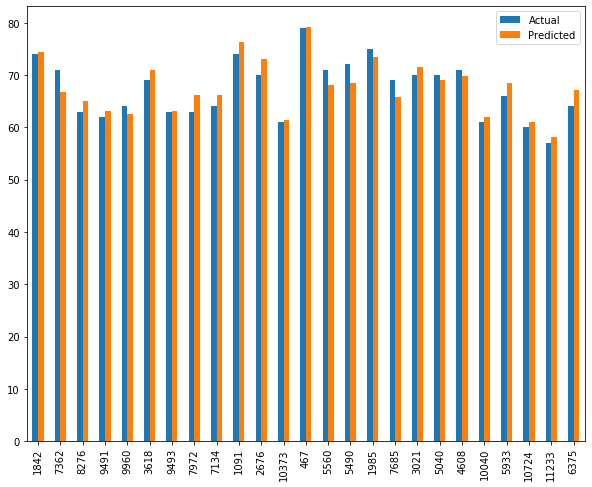

In [25]:
# Comparing predicted values with our model to actual values

plt.figure(figsize=(12,7))
results.plot(kind='bar',figsize=(10,8))
plt.show()

## Applying the model to FIFA 20 to predict overall 2023

In [26]:
df2020 = pd.read_csv('../data/players_20.csv')
df2020.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [27]:
# Drop the Goalkeepers

df2020 = df2020.loc[df2020['player_positions']!='GK']
df2020['player_positions'].value_counts()

CB             2322
ST             1809
CM              786
CDM, CM         731
CM, CDM         682
               ... 
LM, CM, LWB       1
CM, LM, RW        1
LM, RB            1
RM, CM, ST        1
RW, RM, LB        1
Name: player_positions, Length: 642, dtype: int64

In [28]:
objects = df2020.select_dtypes(['object'])
objects.columns

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [29]:
# defining a function to get the number before the sign (+ or -)

def get_value(x):
    if '+' in x:
        return x.split('+')[0]
    elif '-' in x:
        return x.split('-')[0]
    else:
        return x
    
# applying the function to all the columns with values as strings with + or -

cols = ['lcm', 'rcm', 'cm']
    
for col in cols:
    df2020[col] = df2020[col].apply(get_value)
    df2020[col] = pd.to_numeric(df2020[col])

In [30]:
#Selecting same columns to pass them through the model

df_ml2023 = df2020[['overall', 'movement_reactions', 'potential', 'value_eur', 'mentality_composure', 'lcm', 'rcm', 'cm',
             'skill_ball_control', 'attacking_short_passing']]

In [31]:
df_ml2023.isna().sum()

overall                    0
movement_reactions         0
potential                  0
value_eur                  0
mentality_composure        0
lcm                        0
rcm                        0
cm                         0
skill_ball_control         0
attacking_short_passing    0
dtype: int64

In [32]:
y_pred_2023 = lr.predict(df_ml2023)

In [33]:
# New dataframe containing predictions

predictions_df = pd.DataFrame()
predictions_df['sofifa_id'] = df2020['sofifa_id']
predictions_df['name'] = df2020['short_name']
predictions_df['overall_2020'] = df2020['overall']
predictions_df['predicted_overall_2021'] = y_pred_2023

In [34]:
predictions_df.head(25)

,sofifa_id,name,overall_2020,predicted_overall_2021
0,158023,L. Messi,94,94.455997
1,20801,Cristiano Ronaldo,93,92.250445
2,190871,Neymar Jr,92,93.067969
4,183277,E. Hazard,91,91.645787
5,192985,K. De Bruyne,91,91.560027
7,203376,V. van Dijk,90,90.231166
8,177003,L. Modrić,90,89.081060
9,209331,M. Salah,90,90.356257
10,231747,K. Mbappé,89,90.728361
11,201024,K. Koulibaly,89,89.191165


In [35]:
#predictions_df.to_csv('../data/predictions_2021.csv', index=False)